In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score, \
    recall_score, precision_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

2025-05-11 15:51:21.101910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# 1. Load the dataset
DATASET_PATH = '../data/IRIS.csv'
df = pd.read_csv(DATASET_PATH)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# 2. Data Preprocessing
# Check for missing values
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
print("Data Description:")
df.describe()

Data Description:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print("Checking for missing values:")
df.isnull().sum()

Checking for missing values:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
print("Checking for duplicate:")
df.duplicated().sum()

Checking for duplicate:


np.int64(3)

In [7]:
# Handle missing values Or duplicated
df.drop_duplicates(inplace=True)

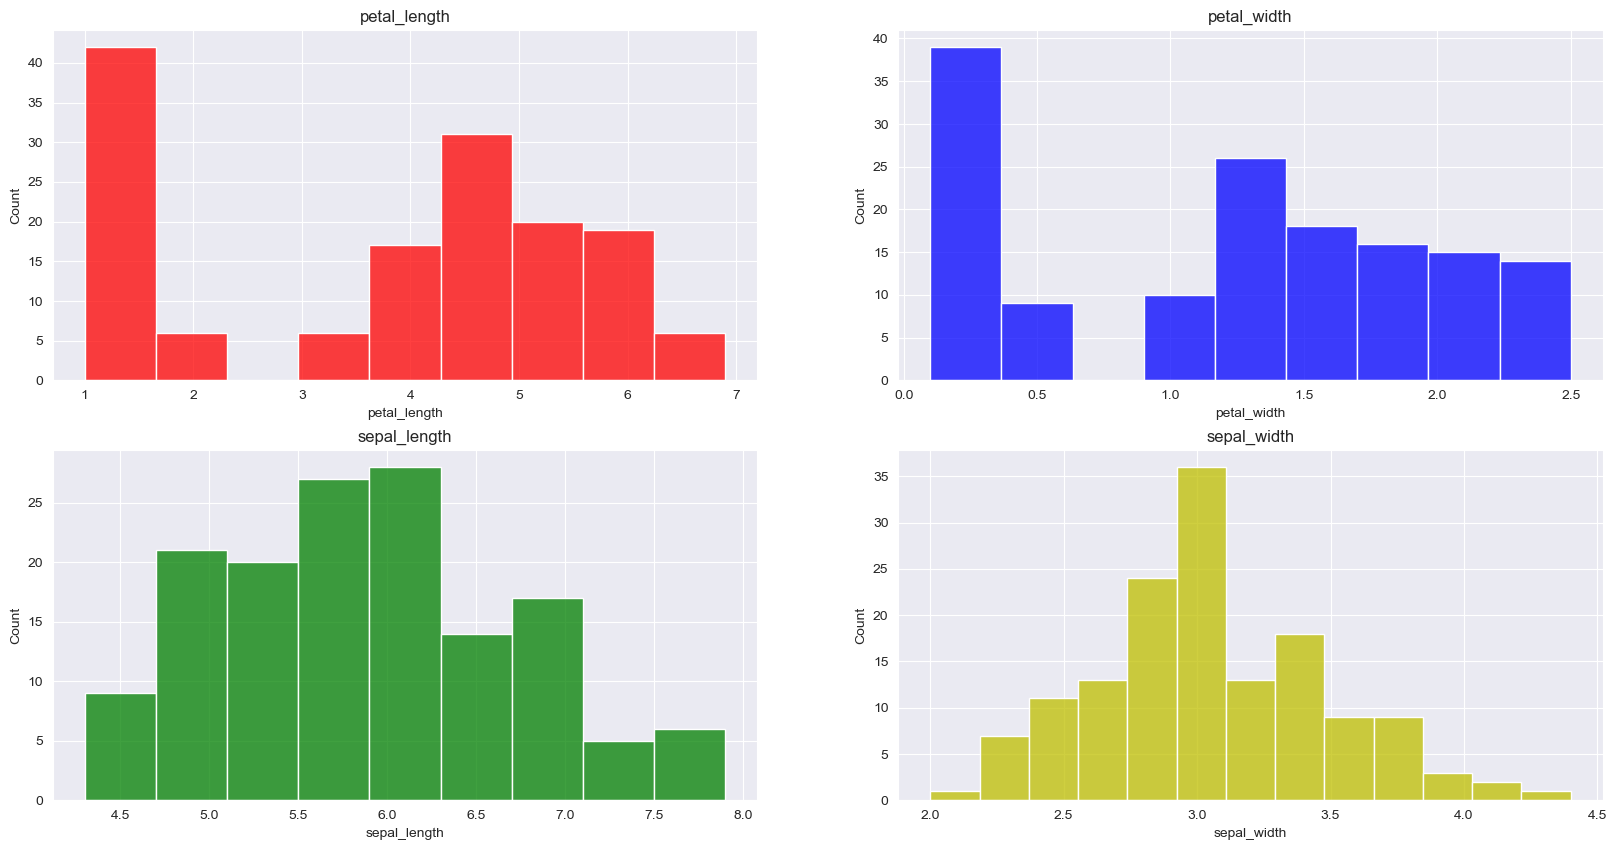

In [8]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.histplot(df.petal_length, color='r')
plt.title('petal_length')

plt.subplot(2, 2, 2)
sns.histplot(df.petal_width, color='b')
plt.title('petal_width')

plt.subplot(2, 2, 3)
sns.histplot(df.sepal_length, color='g')
plt.title('sepal_length')

plt.subplot(2, 2, 4)
sns.histplot(df.sepal_width, color='y')
plt.title('sepal_width')

plt.show()

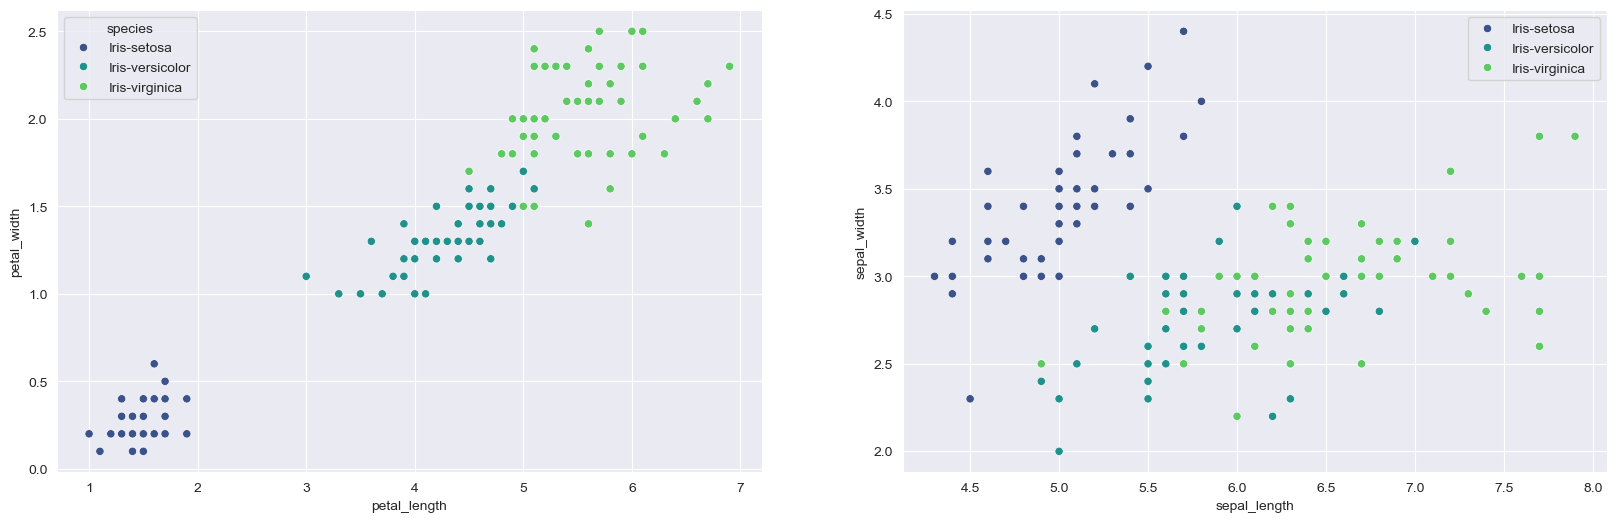

In [9]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(df, x='petal_length', y='petal_width', palette='viridis', hue='species')
plt.subplot(1, 2, 2)
sns.scatterplot(df, x='sepal_length', y='sepal_width', palette='viridis', hue='species')
plt.legend()
plt.show()

In [10]:
# Encoding categorical labels (if necessary)
species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

df['species'] = df['species'].map(species_mapping)

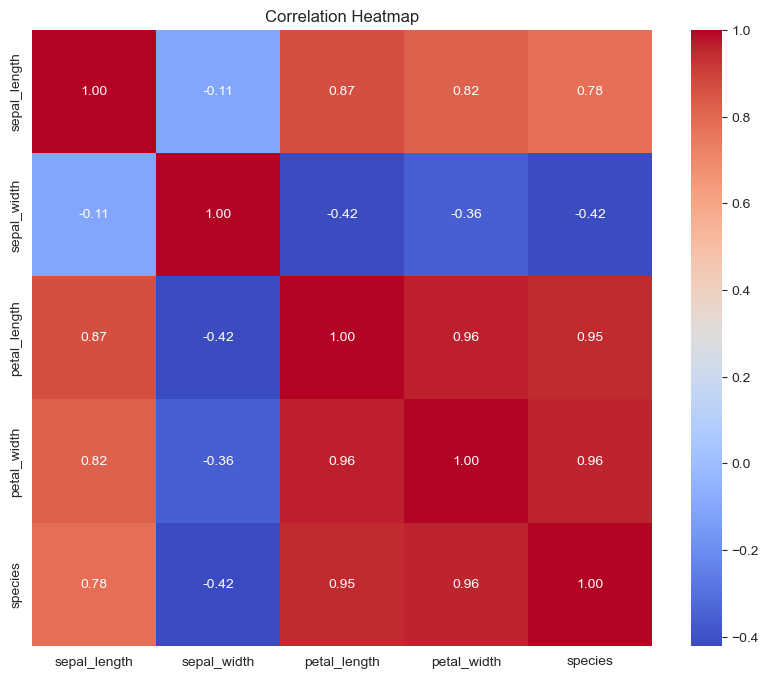

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Splitting the data into features (X) and labels (y)
X = df.drop('species', axis=1)
y = df['species']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# 3. Base SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_train_preds = svm_model.predict(X_train)
svm_test_preds = svm_model.predict(X_test)

print("SVM Training Accuracy:", accuracy_score(y_train, svm_train_preds))
print("SVM Training F1 score (macro):", f1_score(y_train, svm_train_preds, average='macro'))
print("SVM Training Precision (macro):", precision_score(y_train, svm_train_preds, average='macro'))
print("SVM Training Recall (macro):", recall_score(y_train, svm_train_preds, average='macro'))
print(f"{'=' * 50}")
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_preds))
print("SVM Test F1 score (macro):", f1_score(y_test, svm_test_preds, average='macro'))
print("SVM Test Precision (macro):", precision_score(y_test, svm_test_preds, average='macro'))
print("SVM Test Recall (macro):", recall_score(y_test, svm_test_preds, average='macro'))

SVM Training Accuracy: 0.9803921568627451
SVM Training F1 score (macro): 0.9806722689075631
SVM Training Precision (macro): 0.9814814814814815
SVM Training Recall (macro): 0.980952380952381
SVM Test Accuracy: 1.0
SVM Test F1 score (macro): 1.0
SVM Test Precision (macro): 1.0
SVM Test Recall (macro): 1.0


In [15]:
# Hyper Parameter Tune:
cv = StratifiedKFold(n_splits=3)
param_grid = [
    {
        'kernel': ['linear'],
        # 'C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel': ['poly'],
        'degree': [2, 3, 4, 5],
        # 'C': [0.01, 0.1, 1, 10, 100],
        # 'gamma': ['scale', 'auto'],
    },
    {
        'kernel': ['rbf'],
        # 'C': [0.01, 0.1, 1, 10, 100],
        # 'gamma': ['scale', 'auto'],
    }
]

svm_grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid, cv=cv, verbose=3)
svm_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .....................kernel=linear;, score=0.941 total time=   0.0s
[CV 2/3] END .....................kernel=linear;, score=1.000 total time=   0.0s
[CV 3/3] END .....................kernel=linear;, score=0.971 total time=   0.0s
[CV 1/3] END .............degree=2, kernel=poly;, score=0.941 total time=   0.0s
[CV 2/3] END .............degree=2, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/3] END .............degree=2, kernel=poly;, score=0.941 total time=   0.0s
[CV 1/3] END .............degree=3, kernel=poly;, score=0.941 total time=   0.0s
[CV 2/3] END .............degree=3, kernel=poly;, score=0.971 total time=   0.0s
[CV 3/3] END .............degree=3, kernel=poly;, score=0.971 total time=   0.0s
[CV 1/3] END .............degree=4, kernel=poly;, score=0.912 total time=   0.0s
[CV 2/3] END .............degree=4, kernel=poly;, score=0.971 total time=   0.0s
[CV 3/3] END .............degree=4, kernel=poly;,

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True, random_state=42),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4, 5], 'kernel': ['poly']},
                         {'kernel': ['rbf']}],
             verbose=3)

In [16]:
print("Best SVM Parameters:", svm_grid_search.best_params_)
print("Best SVM Cross-Validation Score:", svm_grid_search.best_score_)

Best SVM Parameters: {'kernel': 'linear'}
Best SVM Cross-Validation Score: 0.9705882352941176


In [17]:
# Final SVM Training and Test
final_svm_model = svm_grid_search.best_estimator_
final_svm_model.fit(X_train, y_train)
svm_train_preds = final_svm_model.predict(X_train)
svm_test_preds = final_svm_model.predict(X_test)

print("SVM Training Accuracy:", accuracy_score(y_train, svm_train_preds))
print("SVM Training F1 score (macro):", f1_score(y_train, svm_train_preds, average='macro'))
print("SVM Training Precision (macro):", precision_score(y_train, svm_train_preds, average='macro'))
print("SVM Training Recall (macro):", recall_score(y_train, svm_train_preds, average='macro'))
print(f"{'=' * 50}")
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_preds))
print("SVM Test F1 score (macro):", f1_score(y_test, svm_test_preds, average='macro'))
print("SVM Test Precision (macro):", precision_score(y_test, svm_test_preds, average='macro'))
print("SVM Test Recall (macro):", recall_score(y_test, svm_test_preds, average='macro'))

SVM Training Accuracy: 0.9803921568627451
SVM Training F1 score (macro): 0.9806722689075631
SVM Training Precision (macro): 0.9814814814814815
SVM Training Recall (macro): 0.980952380952381
SVM Test Accuracy: 1.0
SVM Test F1 score (macro): 1.0
SVM Test Precision (macro): 1.0
SVM Test Recall (macro): 1.0


SVM Model Results:


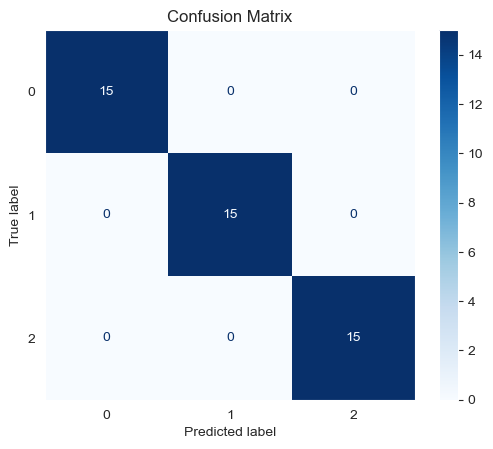

In [18]:
print("SVM Model Results:")
cm = confusion_matrix(y_test, svm_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [19]:
print(classification_report(y_test, svm_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



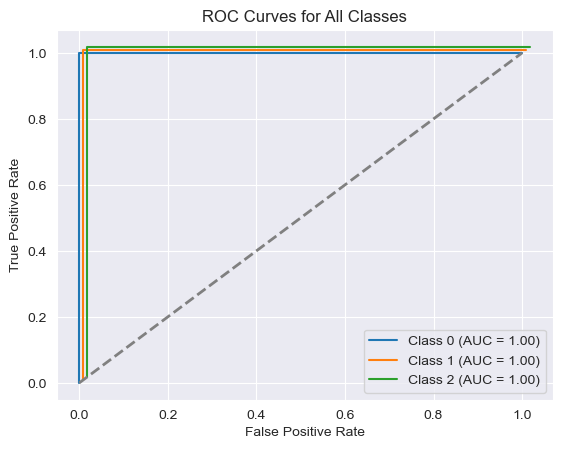

In [20]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
svm_predictions_prob = final_svm_model.predict_proba(X_test)

for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_predictions_prob[:, i])
    roc_auc = auc(fpr, tpr)

    offset = 0.009 * i
    plt.plot(fpr + offset, tpr + offset,
             label=f'Class {i} (AUC = {roc_auc:.2f})',
             linestyle='-')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [21]:
# 4. Neural Network Model
num_classes = 3
base_NN_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

base_NN_model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

base_NN_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3378 - loss: 1.0973  
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5532 - loss: 1.0323
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5357 - loss: 1.0265 
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4676 - loss: 0.9918 
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3066 - loss: 0.9804 
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4732 - loss: 0.9667 
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6453 - loss: 0.9453 
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6341 - loss: 0.9310 
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6025 - loss: 0.9073 
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6038 - loss: 0.8899
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5684 - loss: 0.8987 
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6369 - loss: 0.8594 


In [22]:
nn_predictions_train = np.argmax(base_NN_model.predict(X_train), axis=1)
nn_predictions_test = np.argmax(base_NN_model.predict(X_test), axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [23]:
print("Neural Network Model Results:")
print("NN Training Accuracy:", accuracy_score(y_train, nn_predictions_train))
print("NN Training F1 score (macro):", f1_score(y_train, nn_predictions_train, average='macro'))
print("NN Training Precision (macro):", precision_score(y_train, nn_predictions_train, average='macro'))
print("NN Training Recall (macro):", recall_score(y_train, nn_predictions_train, average='macro'))
print(f"{'=' * 50}")
print("NN Test Accuracy:", accuracy_score(y_test, nn_predictions_test))
print("NN Test F1 score (macro):", f1_score(y_test, nn_predictions_test, average='macro'))
print("NN Test Precision (macro):", precision_score(y_test, nn_predictions_test, average='macro'))
print("NN Test Recall (macro):", recall_score(y_test, nn_predictions_test, average='macro'))

Neural Network Model Results:
NN Training Accuracy: 0.8725490196078431
NN Training F1 score (macro): 0.866032452022074
NN Training Precision (macro): 0.8954535931280118
NN Training Recall (macro): 0.8761904761904762
NN Test Accuracy: 0.8666666666666667
NN Test F1 score (macro): 0.8566176470588235
NN Test Precision (macro): 0.8906088751289989
NN Test Recall (macro): 0.8666666666666667


In [24]:
results = {}
activations = ['relu', 'sigmoid', None]
learning_rates = [0.001, 0.01, 0.1]

for act in activations:
    for lr in learning_rates:
        model = Sequential([
            Input(shape=(X_train.shape[1],)),
            Dense(4, activation=act),
            Dense(num_classes, activation='softmax'),
        ])
        model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                      )
        model.fit(X_train, y_train, epochs=30, verbose=0)
        nn_predictions = np.argmax(model.predict(X_train), axis=1)
        acc = f1_score(y_train, nn_predictions, average='macro')
        results[(act, lr)] = acc

for (act, lr), acc in results.items():
    print(f"Activation Function: {act}, Learning Rate: {lr}, Accuracy: {acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7826e87f0fe0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━

In [25]:
best_config = max(results, key=results.get)
best_acc = results[best_config]
best_act, best_lr = best_config
print(f"Best Activation Function: {best_act}, Best Learning Rate: {best_lr}, Best Accuracy: {best_acc:.4f}")

Best Activation Function: relu, Best Learning Rate: 0.1, Best Accuracy: 0.9613


In [26]:
num_classes = 3
final_NN_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(4, activation=best_act),
    Dense(num_classes, activation='softmax'),
])

final_NN_model.compile(optimizer=Adam(learning_rate=best_lr), loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history = final_NN_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5367 - loss: 1.0210  
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6839 - loss: 0.8226 
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6414 - loss: 0.7216 
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9202 - loss: 0.5718 
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6849 - loss: 0.5080 
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6943 - loss: 0.4588 
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9849 - loss: 0.4027 
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9575 - loss: 0.3805 
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8354 - loss: 0.3517 
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9849 - loss: 0.3138 
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9087 - loss: 0.2950 
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9687 - loss: 0.2504 


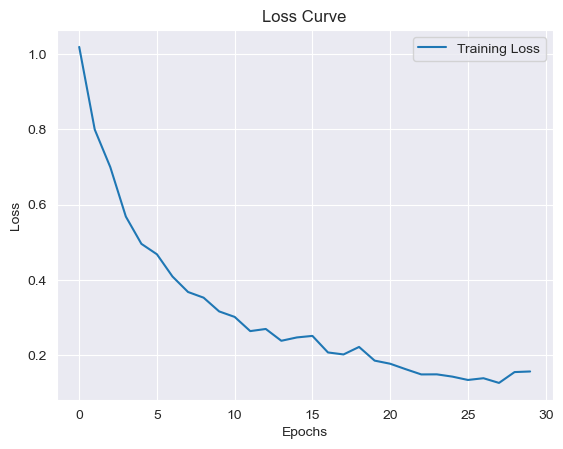

In [27]:
# Plotting Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
nn_predictions_train = np.argmax(final_NN_model.predict(X_train), axis=1)
nn_predictions_test = np.argmax(final_NN_model.predict(X_test), axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [29]:
print("Neural Network Model Results:")
print("NN Training Accuracy:", accuracy_score(y_train, nn_predictions_train))
print("NN Training F1 score (macro):", f1_score(y_train, nn_predictions_train, average='macro'))
print("NN Training Precision (macro):", precision_score(y_train, nn_predictions_train, average='macro'))
print("NN Training Recall (macro):", recall_score(y_train, nn_predictions_train, average='macro'))
print(f"{'=' * 50}")
print("NN Test Accuracy:", accuracy_score(y_test, nn_predictions_test))
print("NN Test F1 score (macro):", f1_score(y_test, nn_predictions_test, average='macro'))
print("NN Test Precision (macro):", precision_score(y_test, nn_predictions_test, average='macro'))
print("NN Test Recall (macro):", recall_score(y_test, nn_predictions_test, average='macro'))

Neural Network Model Results:
NN Training Accuracy: 0.9705882352941176
NN Training F1 score (macro): 0.9709167544783983
NN Training Precision (macro): 0.9736842105263158
NN Training Recall (macro): 0.9705882352941176
NN Test Accuracy: 0.9111111111111111
NN Test F1 score (macro): 0.9095022624434389
NN Test Precision (macro): 0.9298245614035089
NN Test Recall (macro): 0.9111111111111111


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


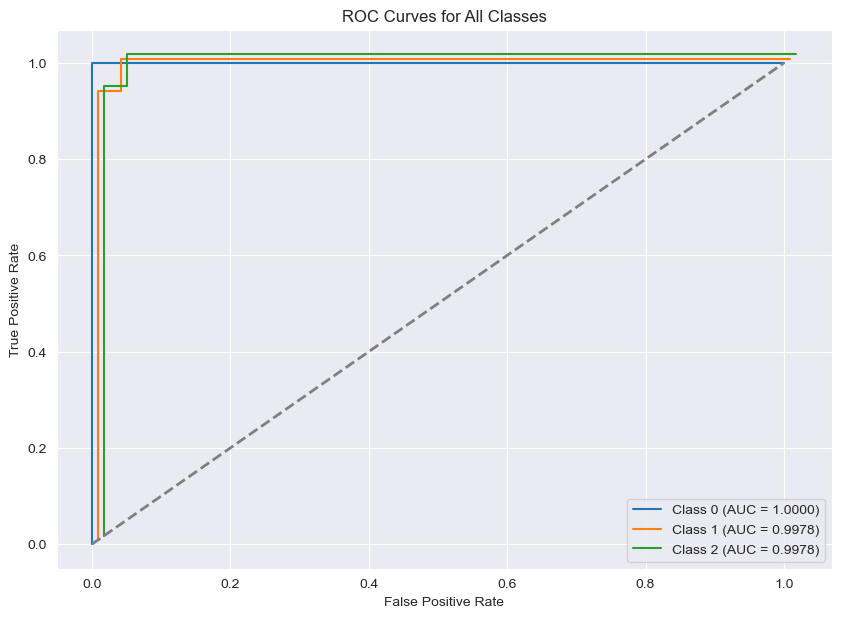

In [33]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
nn_predictions_prob = final_NN_model.predict(X_test)

plt.figure(figsize=(10, 7))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], nn_predictions_prob[:, i])
    roc_auc = auc(fpr, tpr)
    offset = 0.009 * i
    plt.plot(fpr + offset, tpr + offset,
             label=f'Class {i} (AUC = {roc_auc:.4f})',
             linestyle='-')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

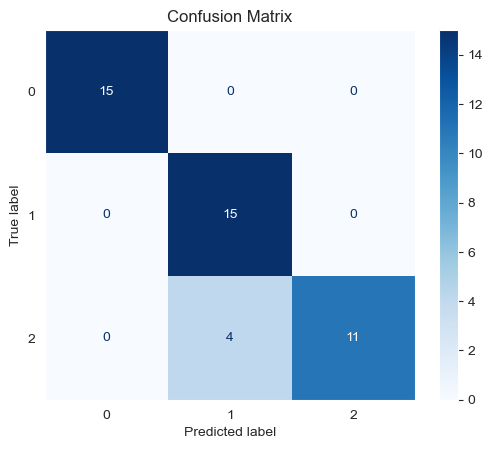

In [31]:
cm = confusion_matrix(y_test, nn_predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [32]:
print(classification_report(y_test, nn_predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

